<a href="https://colab.research.google.com/github/alibagheribardi/Regression/blob/main/RegressionIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
housing =pd.read_csv('housing.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  object 
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.6+ MB


In [3]:
housing = housing.dropna()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  object 
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.7+ MB


In [4]:
housing.isnull().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,"$452,600.0",NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,"$358,500.0",NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,"$352,100.0",NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,"$341,300.0",NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,"$342,200.0",NEAR BAY


In [6]:


features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income',
            'median_house_value', 'ocean_proximity']

def clean_data(text: str) -> float:
    text = text[1:]  # Removes the leading '$'
    text = text.replace(',', '')  # Removes commas
    return float(text)  # Converts to float

# Apply the clean_data function to the median_house_value column
housing['median_house_value'] = housing['median_house_value'].apply(clean_data)


housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
housing.median_house_value.dtype == float
housing.shape[0] ==20433

True

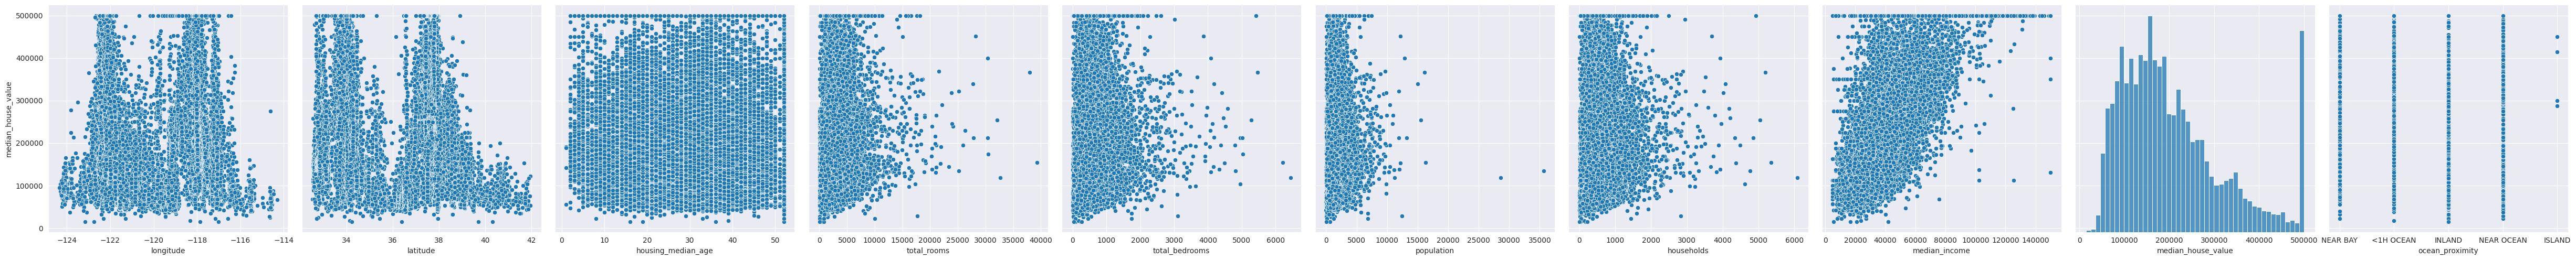

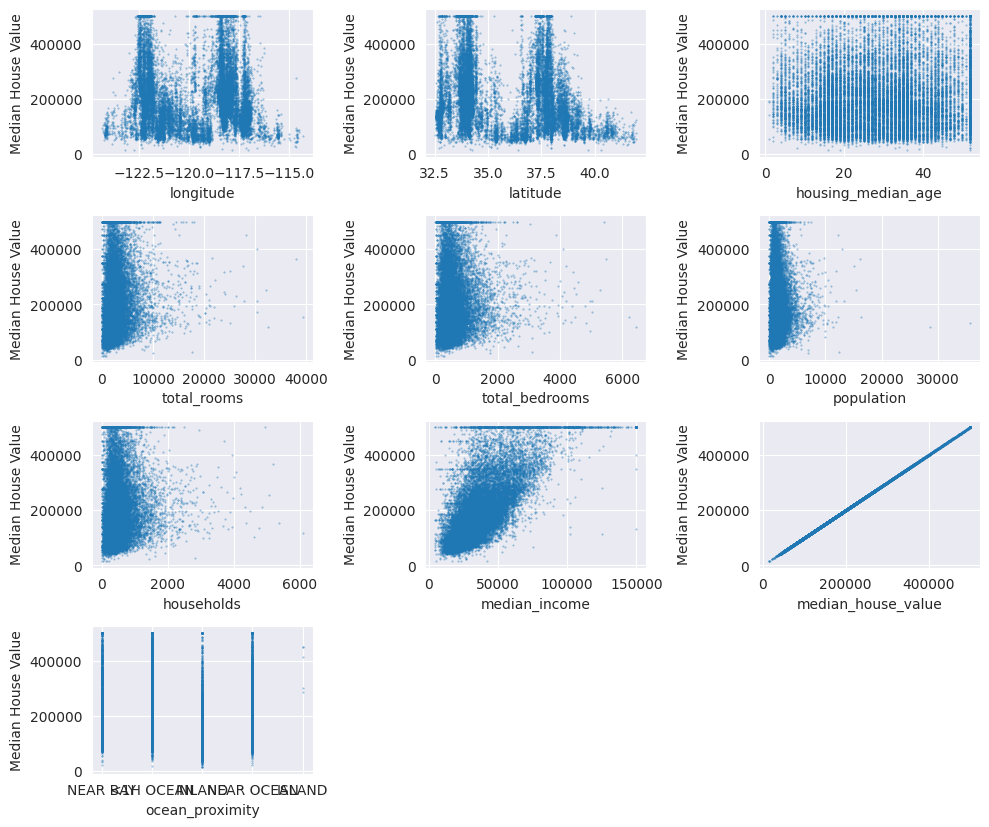

In [9]:
sns.pairplot(housing,
             x_vars=features,
             y_vars='median_house_value',
             height=5)
plt.show()


fig, ax = plt.subplots(5, 3, figsize=(10, 10))  # Create a grid of subplots
ax = ax.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

# Loop through the features and create scatter plots
for index, feature in enumerate(features):
    ax[index].scatter(housing[feature], housing['median_house_value'], alpha=0.5 , s=0.2)
    #ax[index].set_title(f'Scatter plot of {feature} vs Median House Value', fontsize=5)
    ax[index].set_xlabel(feature)
    ax[index].set_ylabel('Median House Value')

# Hide any unused subplots
for i in range(len(features), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots




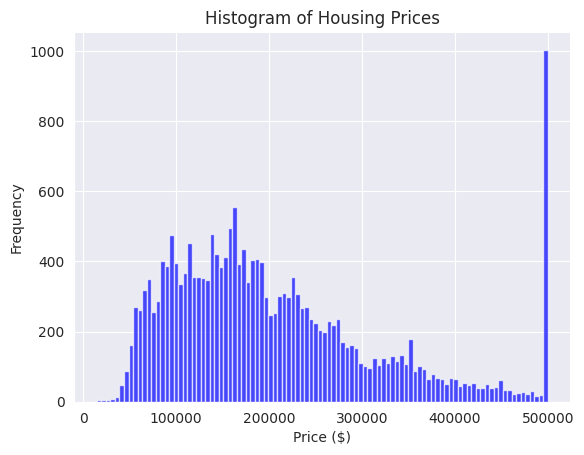

In [15]:
plt.hist(housing['median_house_value'], bins=100, color='blue', alpha=0.7)

# Add titles and labels
plt.title('Histogram of Housing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


In [21]:
over = sum( housing['median_house_value']>=500000 )
total = sum( housing['median_house_value']>=0 )
ratio =  over / total
print(f'The ratio of prices over 500,000 with respect to all is {np.round(ratio,2)}')
print(f'Many {over} cases is available among the total {total}')

The ratio of prices over 500,000 with respect to all is 0.05
Many 985 cases is available among the total 20433


In [23]:
np.unique(housing.ocean_proximity)

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [38]:
count_above_100k = housing[housing['median_house_value'] > 100000].groupby('ocean_proximity').size()
housing.groupby('ocean_proximity').median_house_value.describe()

,count,mean,std,min,25%,50%,75%,max
ocean_proximity,,,,,,,,
<1H OCEAN,9034.0,240267.990812,106198.324980,17500.0,164300.0,215000.0,289475.0,500001.0
INLAND,6496.0,124896.863147,70057.955037,14999.0,77600.0,108700.0,149000.0,500001.0
ISLAND,5.0,380440.000000,80559.561816,287500.0,300000.0,414700.0,450000.0,450000.0
NEAR BAY,2270.0,259279.292070,122853.742095,22500.0,162500.0,233800.0,346000.0,500001.0
NEAR OCEAN,2628.0,249042.355023,122548.010889,22500.0,150000.0,228750.0,322525.0,500001.0


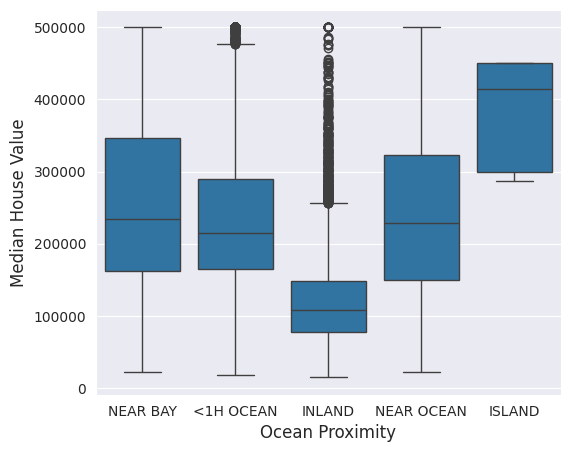

In [39]:
## Boxplot for ocean_proximity
plt.figure(figsize=(6,5))

sns.boxplot(data = housing,
               y = 'median_house_value',
               x = 'ocean_proximity')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("Median House Value", fontsize=12)
plt.xlabel("Ocean Proximity", fontsize=12)

plt.show()

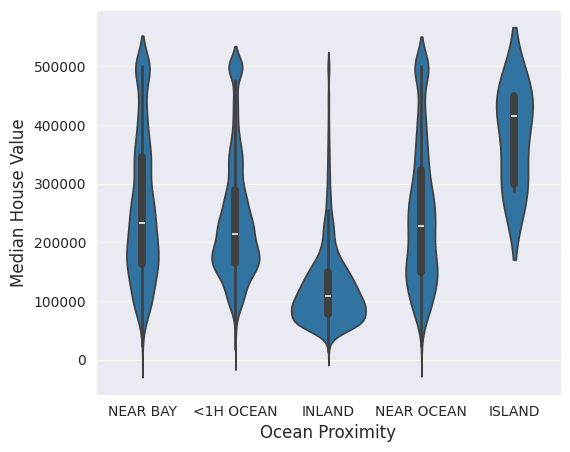

In [41]:
## violinplot for ocean_proximity
plt.figure(figsize=(6,5))

sns.violinplot(data = housing,
               y = 'median_house_value',
               x = 'ocean_proximity')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("Median House Value", fontsize=12)
plt.xlabel("Ocean Proximity", fontsize=12)

plt.show()

In [43]:
from sklearn.model_selection import train_test_split

housing_train, housing_test = train_test_split(housing.copy(),
                                            test_size=.2,
                                            random_state=216,
                                            shuffle=True)



In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error

housing_train['INLAND'] = pd.get_dummies(housing_train.ocean_proximity)['INLAND'] * 1.0
housing_train['rooms_per_household'] = housing_train.total_rooms/housing_train.households

features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'INLAND',
       'rooms_per_household']

knn = Pipeline([('scale', StandardScaler()),('knn', KNeighborsRegressor(n_neighbors=10))])

training_nobs = housing_train.shape[0]
tt_nobs = int(training_nobs*0.8)
housing_tt = housing_train.iloc[:tt_nobs,:]
housing_val = housing_train.iloc[tt_nobs:,:]

knn.fit(housing_tt[features], housing_tt.median_house_value)

val_predictions = knn.predict(housing_val[features])
print(root_mean_squared_error(housing_val.median_house_value, val_predictions))

60163.57920853588
